# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Loading Datasets

In [2]:
df=pd.read_csv('/Users/praveesha/Desktop/IS789/Project/Dataset/Accident_Information.csv', low_memory=False)

In [3]:
df.head(5)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


# Missing Values

### Replacing empty fields with NaN

In [4]:
df.replace(r'^\s*$', np.nan, regex=True)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,NaN,2017-12-17,Sunday,1.0,...,Dumfries and Galloway,Frost or ice,Dual carriageway,NaN,70.0,11:30,Rural,Other,2017,Yes
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dumfries and Galloway,Dry,Single carriageway,NaN,20.0,13:00,Urban,Fine no high winds,2017,Yes
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,NaN,2017-12-18,Monday,1.0,...,Dumfries and Galloway,Wet or damp,Dual carriageway,NaN,70.0,13:30,Rural,Fine no high winds,2017,Yes
2047254,2017984122317,A,708.0,NaN,0.0,Slight,NaN,2017-07-18,Tuesday,1.0,...,Dumfries and Galloway,Dry,Single carriageway,NaN,60.0,18:00,Rural,Fine no high winds,2017,Yes


In [5]:
missing_values=df.isnull().sum()*100/len(df)

# Plotting bar graph of missing columns

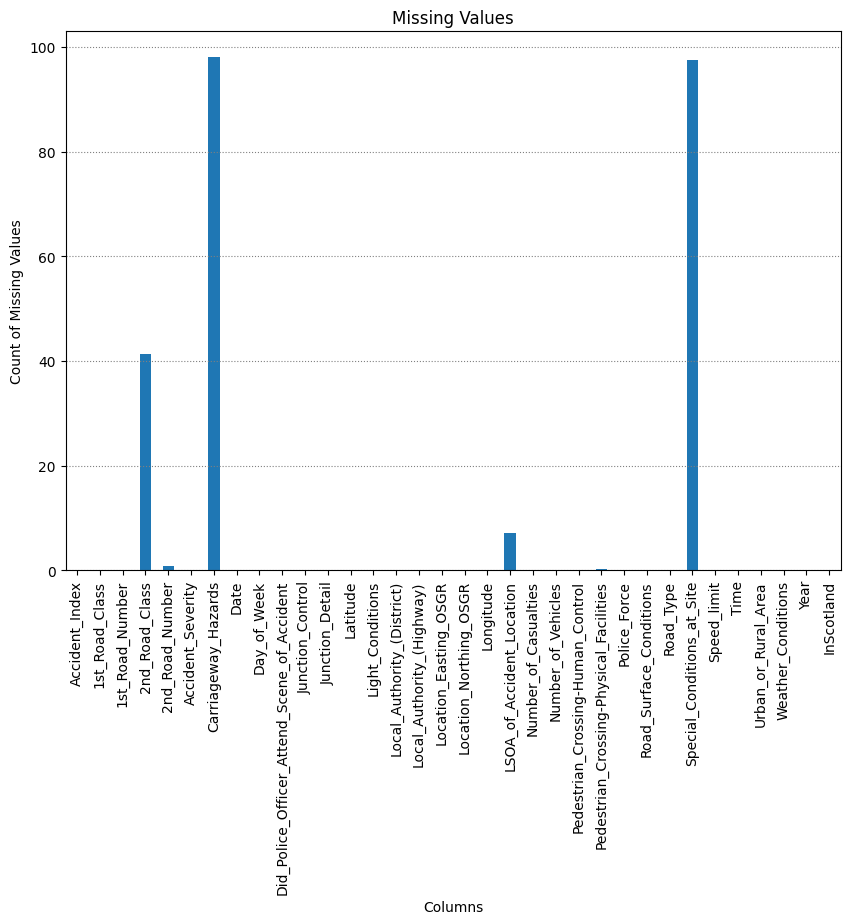

In [6]:
plt.figure(figsize=(10,7))
missing_values.plot(kind='bar')
plt.title("Missing Values")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.grid(axis='y', linestyle=':', color='grey')
plt.show()

In [7]:
df['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [8]:
df['InScotland'].unique()

array(['No', 'Yes', nan], dtype=object)

# Dropping attributes 

#### Carriageway_Hazards - More than 90% of the instances are null
#### Special_Conditions_at_Site - More than 90% of the instances are null
#### 2nd_Road_Class - Almost 50% of the instances are null
#### Accident Index - Does not contribute to prediction, has alphanumeric values when encoded, and will result in multiple columns.
#### Police Force  -Does not contribute to prediction as it is a post-accident reporting column
#### Pedestrian_Crossing-Physical_Facilities, Pedestrian_Crossing-Human_Control -More than 80% of the instances are "None facilities within 50m"; they are imbalanced and do not contribute to prediction
#### LSOA_of_Accident_Location, Local_Authority_(Highway), Local_Authority_(District) contain many unique  values,encoding these columns would result in a dataset harder to work with, introducing too many unnecessary features and potentially overfitting the model

In [9]:
df=df.drop(columns=['Accident_Index', 'Carriageway_Hazards', 'Special_Conditions_at_Site', '2nd_Road_Class'])

In [10]:
df=df.drop(columns=['Did_Police_Officer_Attend_Scene_of_Accident','Police_Force','Local_Authority_(District)','Local_Authority_(Highway)','LSOA_of_Accident_Location'])

In [11]:
# Dropping rows that contain null values
df=df.dropna()

In [12]:
df.isnull().sum()

1st_Road_Class                             0
1st_Road_Number                            0
2nd_Road_Number                            0
Accident_Severity                          0
Date                                       0
Day_of_Week                                0
Junction_Control                           0
Junction_Detail                            0
Latitude                                   0
Light_Conditions                           0
Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Number_of_Casualties                       0
Number_of_Vehicles                         0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Road_Surface_Conditions                    0
Road_Type                                  0
Speed_limit                                0
Time                                       0
Urban_or_Rural_Area                        0
Weather_Co

In [13]:
df.head(5)

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,A,3218.0,0.0,Serious,2005-01-04,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,...,0.0,1.0,Wet or damp,Single carriageway,30.0,17:42,Urban,Raining no high winds,2005,No
1,B,450.0,0.0,Slight,2005-01-05,Wednesday,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,0.0,5.0,Dry,Dual carriageway,30.0,17:36,Urban,Fine no high winds,2005,No
2,C,0.0,0.0,Slight,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,30.0,00:15,Urban,Fine no high winds,2005,No
3,A,3220.0,0.0,Slight,2005-01-07,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,...,0.0,0.0,Dry,Single carriageway,30.0,10:35,Urban,Fine no high winds,2005,No
4,Unclassified,0.0,0.0,Slight,2005-01-10,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,...,0.0,0.0,Wet or damp,Single carriageway,30.0,21:13,Urban,Fine no high winds,2005,No


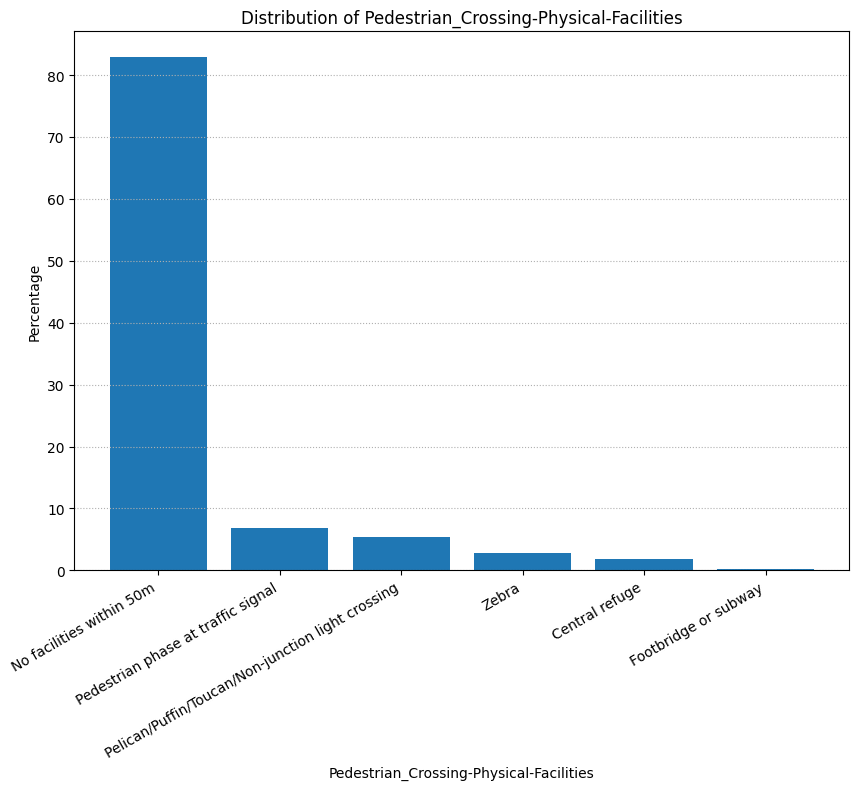

In [14]:
# Pedestrian_Crossing-Physical_Facilities - Over 80% of the values are "No facilities within 50m" so dropping this column due to imbalance and not contributing to the prediction 
count=df['Pedestrian_Crossing-Physical_Facilities'].value_counts()
percent=(count/len(df))*100

mapping={0: 'No facilities within 50m', 1: 'Zebra', 4: 'Pelican/Puffin/Toucan/Non-junction light crossing', 5: 'Pedestrian phase at traffic signal', 7: 'Footbridge or subway', 8: 'Central refuge', -1 :'Data missing/out of range'}
count.index=count.index.map(mapping)
percent.index=percent.index.map(mapping)

plt.figure(figsize=(10,7))
plt.bar(percent.index, percent)
plt.xlabel("Pedestrian_Crossing-Physical-Facilities")
plt.ylabel("Percentage")
plt.title("Distribution of Pedestrian_Crossing-Physical-Facilities")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':')
plt.show()

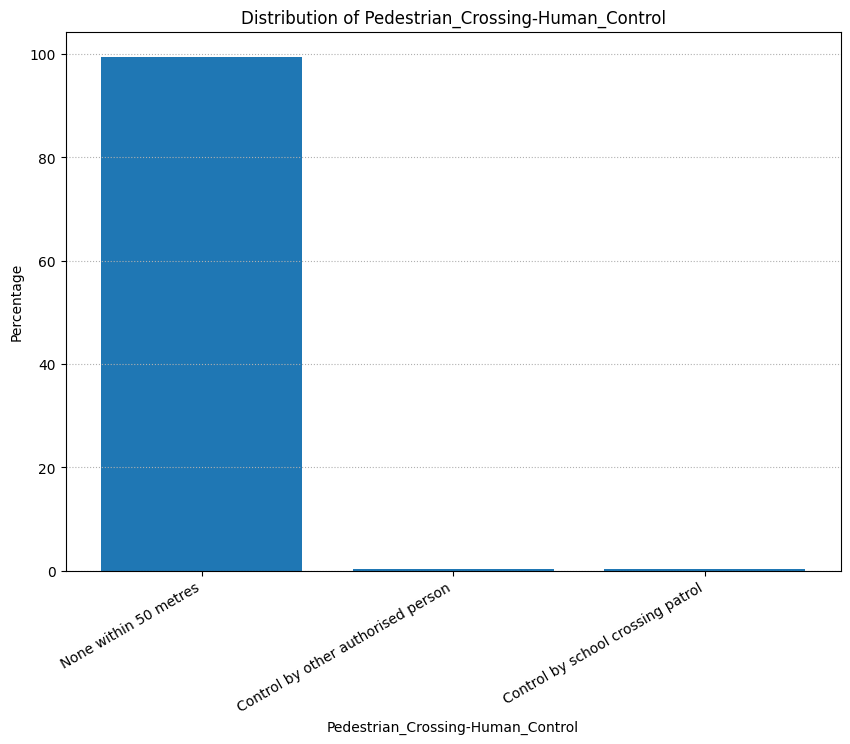

In [15]:
# Pedestrian_Crossing-Human_Control - Over 99% of the values are "None within 50m" so dropping this column due to imbalance and not contributing to the prediction 
count=df['Pedestrian_Crossing-Human_Control'].value_counts()
percent=(count/len(df))*100

mapping={0: 'None within 50 metres', 1: 'Control by school crossing patrol', 2: 'Control by other authorised person'}
count.index=count.index.map(mapping)
percent.index=percent.index.map(mapping)

plt.figure(figsize=(10,7))
plt.bar(percent.index, percent)
plt.xlabel("Pedestrian_Crossing-Human_Control")
plt.ylabel("Percentage")
plt.title("Distribution of Pedestrian_Crossing-Human_Control")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle=':')
plt.show()

In [16]:
df=df.drop(columns=['Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control'])

In [17]:
df.isnull().sum()

1st_Road_Class             0
1st_Road_Number            0
2nd_Road_Number            0
Accident_Severity          0
Date                       0
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Latitude                   0
Light_Conditions           0
Location_Easting_OSGR      0
Location_Northing_OSGR     0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Time                       0
Urban_or_Rural_Area        0
Weather_Conditions         0
Year                       0
InScotland                 0
dtype: int64

# Handling Imbalance and Encoding

## Urban_or_Rural_Area

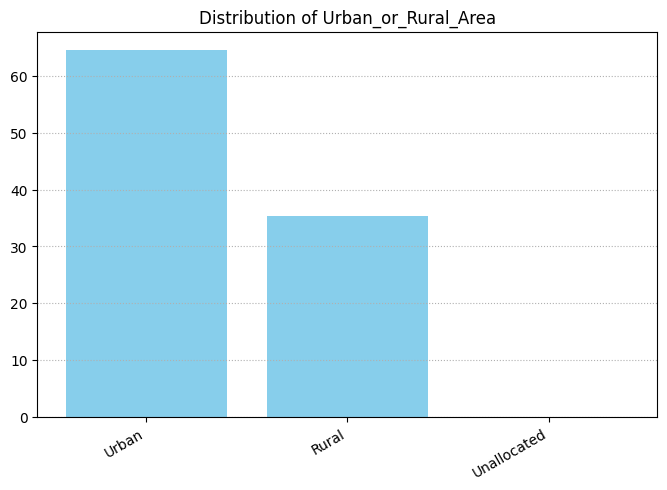

In [18]:
count=df['Urban_or_Rural_Area'].value_counts()
percent=(count/len(df)) * 100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Urban_or_Rural_Area")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [19]:
# Mapping Urban_or_Rural_Area values -0:Urban, 1:Rural 
# Dropping Unallocated rows since they make up only 0.01% of the data and don't contribute to prediction 
df=df[df['Urban_or_Rural_Area']!='Unallocated']
df['Urban_or_Rural_Area']=df['Urban_or_Rural_Area'].map({'Urban':0,'Rural': 1})
print(df['Urban_or_Rural_Area'].value_counts())

Urban_or_Rural_Area
0    1308624
1     716619
Name: count, dtype: int64


## Road_Surface_Conditions

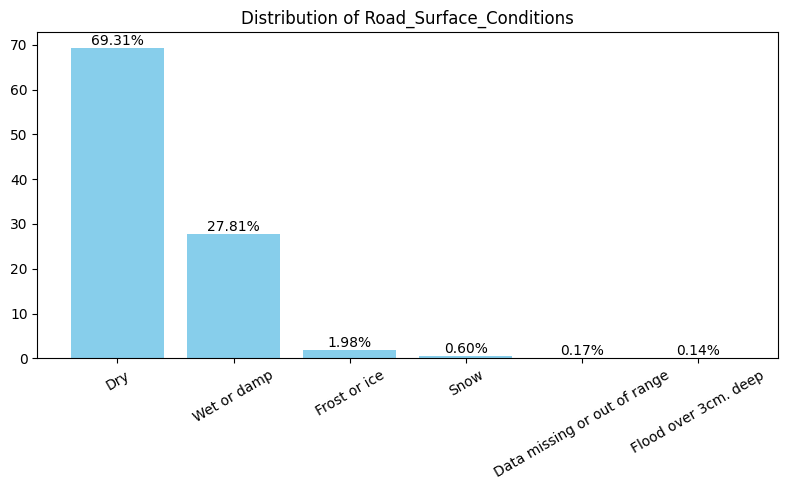

In [20]:
# Road_Surface_Conditions 
counts=df['Road_Surface_Conditions'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Road_Surface_Conditions")
plt.xticks(rotation=30)
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f'{height:.2f}%',ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [21]:
# Grouping Wet or Damp, Frost or ice, snow, flood over 3cm deep into one cateogory called "Slippery" to reduce the imbalance 
# Dropping rows with data missing or out of range as they contain little useful information
df=df[df['Road_Surface_Conditions']!='Data missing or out of range']
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].replace({'Wet or damp':'Slippery','Frost or ice':'Slippery','Snow':'Slippery','Flood over 3cm. deep':'Slippery'})

In [22]:
print(df['Road_Surface_Conditions'].value_counts())

Road_Surface_Conditions
Dry         1403638
Slippery     618257
Name: count, dtype: int64


In [23]:
# Mapping Road_Surface_Conditions values -0:Dry, 1:Slippery 
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].map({'Dry':0,'Slippery': 1})
print(df['Road_Surface_Conditions'].value_counts())

Road_Surface_Conditions
0    1403638
1     618257
Name: count, dtype: int64


##  Weather_Conditions

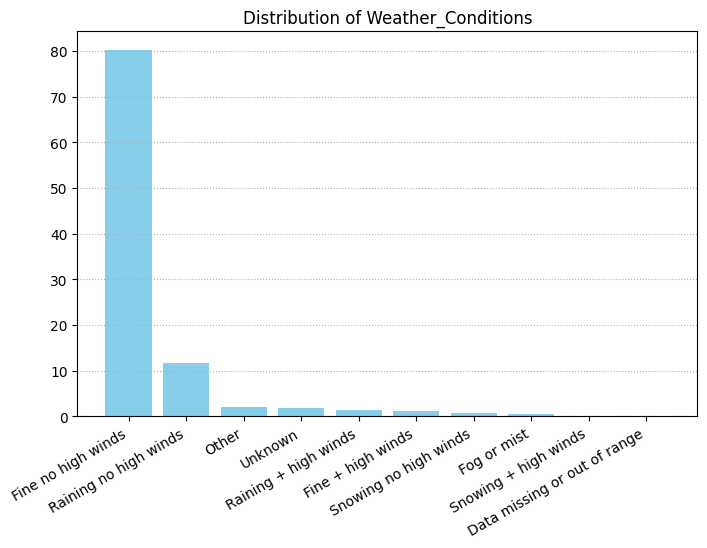

In [24]:
# Weather_Conditions
counts=df['Weather_Conditions'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Weather_Conditions")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [25]:
# Grouping Raining no high winds, Other, Unknown, Raining + high winds, Fine + high winds,Snowing no high winds, Fog or mist,Snowing + high winds into one cateogory called "Intense" to reduce the imabalance 
# Considering Fine no high winds as a "Normal" 
# Dropping rows with data missing or out of range.
df['Weather_Conditions']=df['Weather_Conditions'].replace({'Fine no high winds':'Normal','Raining no high winds':'Intense','Other':'Intense','Unknown':'Intense','Raining + high winds':'Intense','Fine + high winds':'Intense','Snowing no high winds':'Intense','Fog or mist':'Intense','Snowing + high winds':'Intense'})
df=df[df['Weather_Conditions']!='Data missing or out of range']

In [26]:
print(df['Weather_Conditions'].value_counts())

Weather_Conditions
Normal     1622836
Intense     398916
Name: count, dtype: int64


In [27]:
# Mapping Weather_Conditions values -0:Normal, 1:Intense
df['Weather_Conditions']=df['Weather_Conditions'].map({'Normal':0,'Intense': 1})
print(df['Weather_Conditions'].value_counts())

Weather_Conditions
0    1622836
1     398916
Name: count, dtype: int64


## Light_Conditions

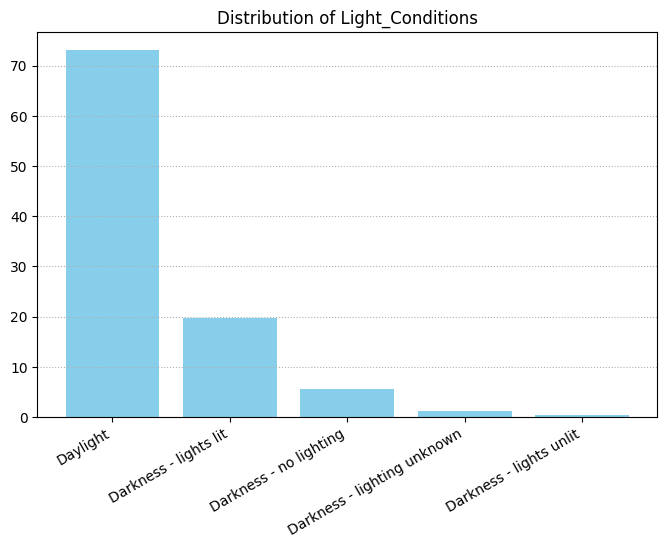

In [28]:
# Light_Conditions
counts=df['Light_Conditions'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Light_Conditions")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [29]:
# Grouping Darkness-light lit, Darkness-no lighting, Darkness-lighting unknown, Darkness-lights unlit into one category called "Darkness" to reduce the imbalance 
df['Light_Conditions']=df['Light_Conditions'].replace({'Darkness - lights lit':'Darkness','Darkness - no lighting':'Darkness','Darkness - lighting unknown':'Darkness','Darkness - lights unlit':'Darkness'})
print(df['Light_Conditions'].value_counts())

Light_Conditions
Daylight    1476560
Darkness     545192
Name: count, dtype: int64


In [30]:
# Mapping Light_Conditions values - 0:Daylight, 1:Darkness
df['Light_Conditions']=df['Light_Conditions'].map({'Daylight':0,'Darkness':1})
print(df['Light_Conditions'].value_counts())

Light_Conditions
0    1476560
1     545192
Name: count, dtype: int64


## Junction_Control

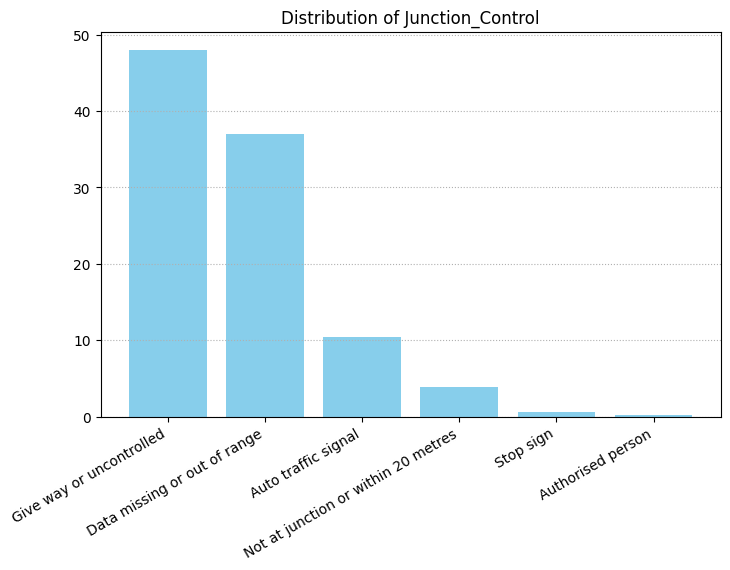

In [31]:
# Junction_Control
counts=df['Junction_Control'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Junction_Control")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [32]:
# Dropping rows with data missing or out of range as they do not contribute to prediction
# Grouping Stop sign, Authorised person and also Not a junction or within 20 meters as one category called "Non-signal control"
df['Junction_Control']=df['Junction_Control'].replace({'Stop sign':'Non-signal control','Authorised person':'Non-signal control','Not at junction or within 20 metres':'Non-signal control'})
df=df[df['Junction_Control']!='Data missing or out of range']
print(df['Junction_Control'].value_counts())

Junction_Control
Give way or uncontrolled    970414
Auto traffic signal         209880
Non-signal control           93038
Name: count, dtype: int64


In [33]:
# mapping Junction_Control values - 0:Give way or uncontrolled, 1:Auto traffic signal, 2:Non-signal control
df['Junction_Control']=df['Junction_Control'].map({'Give way or uncontrolled':0,'Auto traffic signal':1,'Non-signal control':2})
print(df['Junction_Control'].value_counts())

Junction_Control
0    970414
1    209880
2     93038
Name: count, dtype: int64


##  Day_of_Week

In [34]:
# Mapping  Day_of_Week values -0:Monday, 1:Tuesday, 2:Wednesday, 3:Thursday, 4:Friday, 5:Saturday,6:Sunday
df['Day_of_Week']=df['Day_of_Week'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})
print(df['Day_of_Week'].value_counts())

Day_of_Week
4    209535
2    195614
3    194447
1    194199
0    181836
5    165607
6    132094
Name: count, dtype: int64


## Road_Type

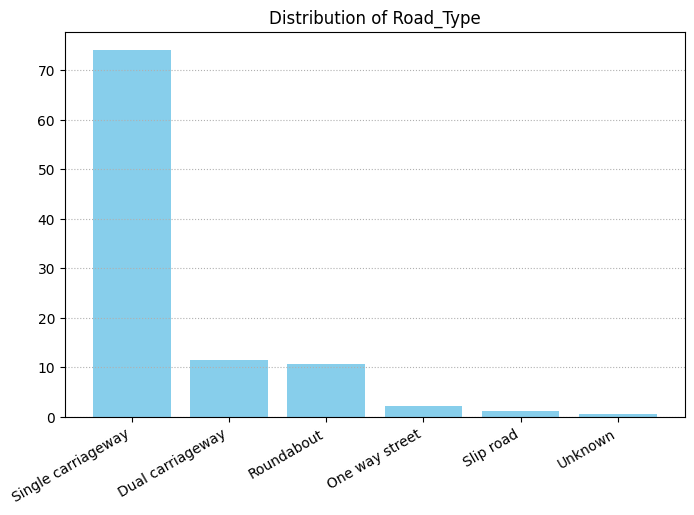

In [35]:
# Road_Type 
counts=df['Road_Type'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Road_Type")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [36]:
# Grouping Oneway street,slip road and Unknow as one category called "Other" to handle the imbalance 
# Dropping Data missing or out of range as it has only one row 
df['Road_Type']=df['Road_Type'].replace({'One way street':'Other','Slip road':'Other','Unknown':'Other'})
print(df['Road_Type'].value_counts())

Road_Type
Single carriageway    942484
Dual carriageway      144959
Roundabout            134846
Other                  51043
Name: count, dtype: int64


In [37]:
# Mapping Road_Type values  - 0:Dual carriageway, 1:Single carriageway, 2:One way street, 3:Roundabout, 4:Slip road,5:Unknown
df['Road_Type']=df['Road_Type'].map({'Dual carriageway':0,'Single carriageway':1,'Roundabout':2,'Other':3})
print(df['Road_Type'].value_counts())

Road_Type
1    942484
0    144959
2    134846
3     51043
Name: count, dtype: int64


## Time

In [38]:
def encode_time(time_str):
    if pd.isnull(time_str):
        return np.nan,np.nan
    hours,minutes=map(int,time_str.split(':'))
    return hours,minutes 
df[['Accident_Hour','Accident_Minute']]=df['Time'].apply(lambda x:pd.Series(encode_time(x)))
print(df[['Time','Accident_Hour','Accident_Minute']])

          Time  Accident_Hour  Accident_Minute
1        17:36             17               36
6        20:40             20               40
8        22:43             22               43
9        16:00             16                0
10       00:42              0               42
...        ...            ...              ...
2047236  14:25             14               25
2047239  13:09             13                9
2047250  15:15             15               15
2047253  13:30             13               30
2047255  13:00             13                0

[1273332 rows x 3 columns]


In [39]:
df=df.drop(columns=['Time'])

## Accident_Severity

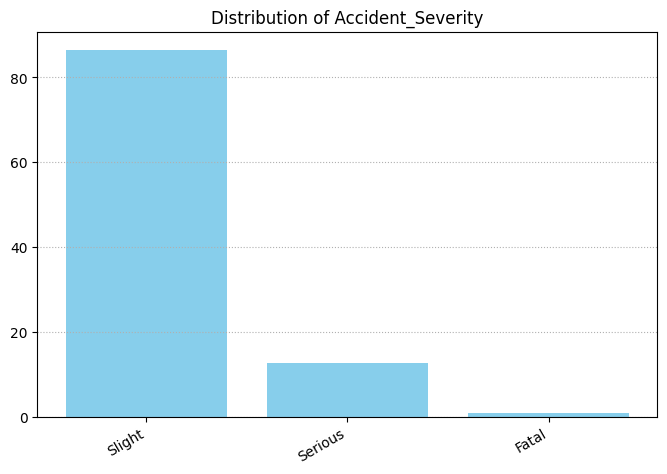

In [40]:
counts=df['Accident_Severity'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Accident_Severity")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [41]:
# Grouping Serious and fatal instances into one category called serious_to_fatal to handle the imbalance
df['Accident_Severity']=df['Accident_Severity'].replace({'Serious':'Serious_to_Fatal','Fatal':'Serious_to_Fatal'})
print(df['Accident_Severity'].value_counts())

Accident_Severity
Slight              1101093
Serious_to_Fatal     172239
Name: count, dtype: int64


In [42]:
# Mapping Accident_Severity values -0:Slight, 1:serious_to_fatal
df['Accident_Severity']=df['Accident_Severity'].map({'Slight':0,'Serious_to_Fatal':1})
print(df['Accident_Severity'].value_counts())

Accident_Severity
0    1101093
1     172239
Name: count, dtype: int64


## Junction_Detail

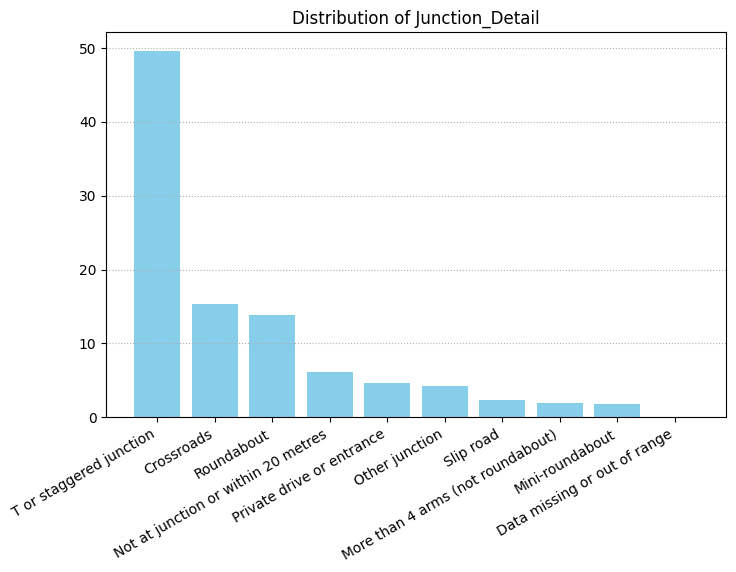

In [43]:
counts=df['Junction_Detail'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of Junction_Detail")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [44]:
# Dropping Data missing or out of range since there are too few instances to handle the imbalance
# Grouping Crossroads and More than 4 arms(not roundabout) and Slip road into one cateogory called "Complex_Junction", Roundabout and Mini-roundabout into one category called"Roundabout", Private drive or entrance and Other junction into one cateogory called "Other"
df=df[df['Junction_Detail']!='Data missing or out of range']
df['Junction_Detail']=df['Junction_Detail'].replace({'Crossroads':'Complex_Junction','Roundabout':'Roundabout','More than 4 arms (not roundabout)':'Complex_Junction','Crossroads':'Complex_Junction','Slip road':'Complex_Junction','Mini-roundabout':'Roundabout','Private drive or entrance':'Other','Other junction':'Other','Not at junction or within 20 metres':'Other'})
print(df['Junction_Detail'].value_counts())

Junction_Detail
T or staggered junction    632263
Complex_Junction           250765
Roundabout                 198683
Other                      191606
Name: count, dtype: int64


In [45]:
# Mapping Junction_Detail values- T or staggered junction:0, Complex_Junction:1, Roundabout:2, Other:3
df['Junction_Detail']=df['Junction_Detail'].map({'T or staggered junction':0,'Complex_Junction':1,'Roundabout':2,'Other':3})
print(df['Junction_Detail'].value_counts())

Junction_Detail
0    632263
1    250765
2    198683
3    191606
Name: count, dtype: int64


## Date

In [46]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
print(df[['Date','Day','Month']])

              Date  Day  Month
1       2005-01-05    5      1
6       2005-01-13   13      1
8       2005-01-15   15      1
9       2005-01-15   15      1
10      2005-01-16   16      1
...            ...  ...    ...
2047236 2017-10-09    9     10
2047239 2017-10-26   26     10
2047250 2017-12-14   14     12
2047253 2017-12-18   18     12
2047255 2017-12-20   20     12

[1273317 rows x 3 columns]


In [47]:
df=df.drop(columns=['Date'])

In [48]:
df.head(5)

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Location_Easting_OSGR,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Accident_Hour,Accident_Minute,Day,Month
1,B,450.0,0.0,0,2,1,1,51.520075,1,524170.0,...,0,30.0,0,0,2005,No,17,36,5,1
6,C,0.0,0.0,0,3,0,0,51.512695,1,524220.0,...,1,30.0,0,0,2005,No,20,40,13,1
8,A,3212.0,304.0,0,5,1,1,51.483420,1,527350.0,...,1,30.0,0,0,2005,No,22,43,15,1
9,B,450.0,0.0,0,5,0,0,51.512443,0,524550.0,...,1,30.0,0,0,2005,No,16,0,15,1
10,A,4.0,325.0,0,6,1,1,51.494902,1,526240.0,...,1,30.0,0,0,2005,No,0,42,16,1


## InScotland

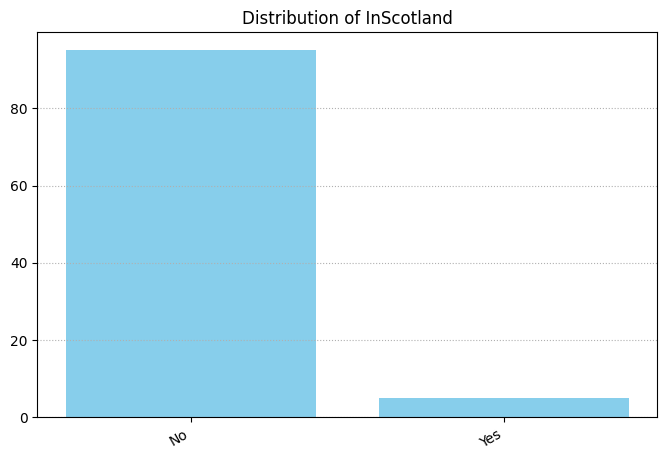

In [49]:
counts=df['InScotland'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of InScotland")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [50]:
# mapping InScotland values - 0:Yes, 1:No
df['InScotland']=df['InScotland'].map({'Yes':0,'No':1})
print(df['InScotland'].value_counts())

InScotland
1    1209865
0      63452
Name: count, dtype: int64


## Creating Season feature based on the month

In [51]:
def map_season(month):
    if month in[12,1,2]:
        return 'Winter'
    elif month in[3,4,5]:
        return 'Spring'
    elif month in[6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return None 
df['Season']=df['Month'].apply(map_season)
print(df[['Month','Season']].head(20))

    Month  Season
1       1  Winter
6       1  Winter
8       1  Winter
9       1  Winter
10      1  Winter
11      1  Winter
12      1  Winter
13      1  Winter
15      1  Winter
16      1  Winter
17      1  Winter
19      1  Winter
21      1  Winter
22      1  Winter
23      1  Winter
24      1  Winter
25      1  Winter
27      1  Winter
28      2  Winter
29      2  Winter


## Season 

In [52]:
season_order=[['Winter','Spring','Summer','Autumn']]
ordinal_encoder=OrdinalEncoder(categories=season_order)
df['Season']=ordinal_encoder.fit_transform(df[['Season']])
df['Season']=df['Season'].astype(int)
season_mapping=pd.DataFrame({'Season':season_order[0],'Encoded_value':range(len(season_order[0]))})
print(season_mapping)

   Season  Encoded_value
0  Winter              0
1  Spring              1
2  Summer              2
3  Autumn              3


In [53]:
df.head(20)

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Location_Easting_OSGR,...,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Accident_Hour,Accident_Minute,Day,Month,Season
1,B,450.0,0.0,0,2,1,1,51.520075,1,524170.0,...,30.0,0,0,2005,1,17,36,5,1,0
6,C,0.0,0.0,0,3,0,0,51.512695,1,524220.0,...,30.0,0,0,2005,1,20,40,13,1,0
8,A,3212.0,304.0,0,5,1,1,51.483420,1,527350.0,...,30.0,0,0,2005,1,22,43,15,1,0
9,B,450.0,0.0,0,5,0,0,51.512443,0,524550.0,...,30.0,0,0,2005,1,16,0,15,1,0
10,A,4.0,325.0,0,6,1,1,51.494902,1,526240.0,...,30.0,0,0,2005,1,0,42,16,1,0
11,A,3220.0,308.0,0,1,1,1,51.484044,1,526170.0,...,30.0,0,0,2005,1,20,48,25,1,0
12,Unclassified,0.0,3220.0,0,1,0,0,51.491632,0,525590.0,...,30.0,0,1,2005,1,12,55,11,1,0
13,A,3217.0,3216.0,0,1,0,0,51.492622,1,527990.0,...,30.0,0,1,2005,1,5,1,18,1,0
15,A,3217.0,0.0,0,1,0,0,51.481912,0,526460.0,...,30.0,0,0,2005,1,10,50,18,1,0
16,Unclassified,0.0,0.0,1,3,0,0,51.500191,1,524680.0,...,30.0,0,0,2005,1,0,15,20,1,0


## 1st_Road_Class

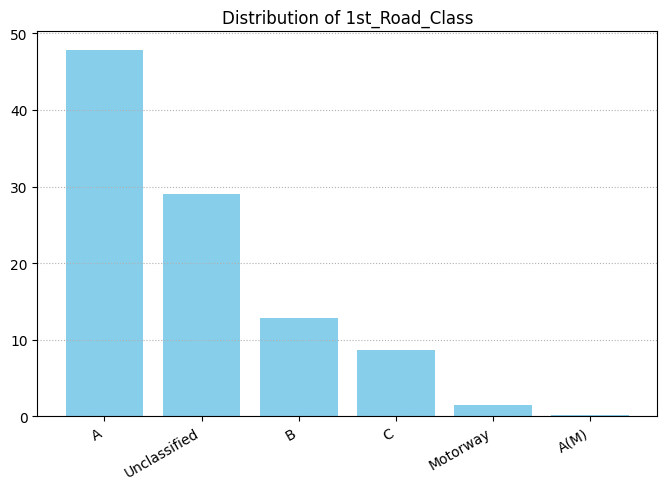

In [54]:
counts=df['1st_Road_Class'].value_counts()
percent=(counts/len(df))*100
plt.figure(figsize=(8,5))
bars=plt.bar(percent.index.astype(str),percent.values,color='skyblue')
plt.title("Distribution of 1st_Road_Class")
plt.xticks(rotation=30,ha='right',fontsize=10)
plt.grid(axis='y',linestyle=':')
plt.show()

In [55]:
# Grouping B,C,Motorway and A(M) into one category as "Other" to handle the imbalance 
df['1st_Road_Class']=df['1st_Road_Class'].replace({'B':'Other','C':'Other','Motorway':'Other','A(M)':'Other'})
print(df['1st_Road_Class'].value_counts())

1st_Road_Class
A               609186
Unclassified    368803
Other           295328
Name: count, dtype: int64


In [56]:
# Mapping '1st_Road_Class' values -A:0,Unclassified:1,Other:2
df['1st_Road_Class']=df['1st_Road_Class'].map({'A':0,'Unclassified':1,'Other':2})
print(df['1st_Road_Class'].value_counts())

1st_Road_Class
0    609186
1    368803
2    295328
Name: count, dtype: int64


In [57]:
df.shape

(1273317, 26)

In [58]:
print(df.dtypes)

1st_Road_Class               int64
1st_Road_Number            float64
2nd_Road_Number            float64
Accident_Severity            int64
Day_of_Week                  int64
Junction_Control             int64
Junction_Detail              int64
Latitude                   float64
Light_Conditions             int64
Location_Easting_OSGR      float64
Location_Northing_OSGR     float64
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions      int64
Road_Type                    int64
Speed_limit                float64
Urban_or_Rural_Area          int64
Weather_Conditions           int64
Year                         int64
InScotland                   int64
Accident_Hour                int64
Accident_Minute              int64
Day                          int32
Month                        int32
Season                       int64
dtype: object


In [59]:
df.describe()

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Location_Easting_OSGR,...,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Accident_Hour,Accident_Minute,Day,Month,Season
count,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,...,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06,1.273317e+06
mean,7.535115e-01,1.025863e+03,5.919761e+02,1.352680e-01,2.848832e+00,3.109579e-01,9.604435e-01,5.246694e+01,2.600562e-01,4.449386e+05,...,3.596831e+01,2.661631e-01,1.883388e-01,2.010369e+03,9.501679e-01,1.366337e+01,2.688505e+01,1.559415e+01,6.633428e+00,1.557324e+00
std,8.059804e-01,1.818650e+03,1.582390e+03,3.420097e-01,1.909058e+00,6.003318e-01,1.119344e+00,1.378566e+00,4.386652e-01,9.357902e+04,...,1.198740e+01,4.419507e-01,3.909826e-01,3.714801e+00,2.175979e-01,5.019254e+00,1.750496e+01,8.738997e+00,3.424658e+00,1.119632e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.991443e+01,0.000000e+00,6.586000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.147810e+01,0.000000e+00,3.838500e+05,...,3.000000e+01,0.000000e+00,0.000000e+00,2.007000e+03,1.000000e+00,1.000000e+01,1.100000e+01,8.000000e+00,4.000000e+00,1.000000e+00
50%,1.000000e+00,1.530000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,5.203878e+01,0.000000e+00,4.462440e+05,...,3.000000e+01,0.000000e+00,0.000000e+00,2.010000e+03,1.000000e+00,1.400000e+01,2.900000e+01,1.600000e+01,7.000000e+00,2.000000e+00
75%,1.000000e+00,7.490000e+02,1.320000e+02,0.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,5.342220e+01,1.000000e+00,5.264100e+05,...,4.000000e+01,1.000000e+00,0.000000e+00,2.014000e+03,1.000000e+00,1.700000e+01,4.200000e+01,2.300000e+01,1.000000e+01,3.000000e+00
max,2.000000e+00,9.999000e+03,9.999000e+03,1.000000e+00,6.000000e+00,2.000000e+00,3.000000e+00,6.066204e+01,1.000000e+00,6.553910e+05,...,7.000000e+01,1.000000e+00,1.000000e+00,2.017000e+03,1.000000e+00,2.300000e+01,5.900000e+01,3.100000e+01,1.200000e+01,3.000000e+00


# Imbalance on target label
### - Performing resampling (1:2 ratio)

In [60]:
print(df['Accident_Severity'].value_counts())

Accident_Severity
0    1101078
1     172239
Name: count, dtype: int64


In [61]:
from sklearn.utils import resample
#Splitting data
df_minority_class=df[df['Accident_Severity']==1] #Serious_to_Fatal class
df_majority_class=df[df['Accident_Severity']==0] #Slight class

In [62]:
# Resampling with 1:2 ratio
df_majority_resampled=resample(df_majority_class,replace=False,n_samples=344_478, random_state=42)

In [63]:
df_bal=pd.concat([df_minority_class,df_majority_resampled]).sample(frac=1,random_state=42)

In [64]:
print(df_bal['Accident_Severity'].value_counts())

Accident_Severity
0    344478
1    172239
Name: count, dtype: int64


In [68]:
# Downloading the preprocessed dataset
df_bal.to_csv('Accident_Information_Balanced.csv',index=False, sep=',', encoding='utf-8')

In [69]:
df_bal.dtypes

1st_Road_Class               int64
1st_Road_Number            float64
2nd_Road_Number            float64
Accident_Severity            int64
Day_of_Week                  int64
Junction_Control             int64
Junction_Detail              int64
Latitude                   float64
Light_Conditions             int64
Location_Easting_OSGR      float64
Location_Northing_OSGR     float64
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions      int64
Road_Type                    int64
Speed_limit                float64
Urban_or_Rural_Area          int64
Weather_Conditions           int64
Year                         int64
InScotland                   int64
Accident_Hour                int64
Accident_Minute              int64
Day                          int32
Month                        int32
Season                       int64
dtype: object